This file is from [Reference Link](https://github.com/Roger-Li/ucb_cs285_homework_fall2023/blob/main/hw2/cs285/scripts/hw2_answers.ipynb)

In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Directory where the TensorBoard logs are stored
# log_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "data")
log_dir = os.path.join(os.getcwd(), "data")

run_folders = [os.path.join(log_dir, run) for run in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, run))]

In [3]:
def learning_curve_plotter(run_folders, keyword='cartpole', exclude='', step_label='Train_EnvstepsSoFar', value_label='Eval_AverageReturn'):

    # Filter out the runs that contain the keyword
    if exclude == '':
        file_list = [run for run in run_folders if keyword in run]
    else:
        file_list = [run for run in run_folders if (keyword in run) and (exclude not in run)]

    plt.figure(figsize=(10, 6))

    # Loop through small_batch run folder to extract and plot the data
    for run_folder in file_list:
        event_acc = EventAccumulator(run_folder)
        event_acc.Reload()

        # Extracting values to plot
        try:
            steps = np.array([int(s.step) for s in event_acc.Scalars(step_label)])
            values = np.array([s.value for s in event_acc.Scalars(value_label)])

            # Plotting
            plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
        except Exception as e:
            print(f"Could not retrieve data for {run_folder}: {e}")

    # Adding legends, labels and title
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.xlabel('Train_EnvstepsSoFar')
    plt.ylabel(value_label)
    plt.title(f'{keyword} - {value_label} vs. {step_label}')

    # Show plot
    plt.show()

## 3. Policy Gradeints

### Experiment 1: Cart Pole
Plot Evaluation Average Return against # of environment steps


- Small batch runs

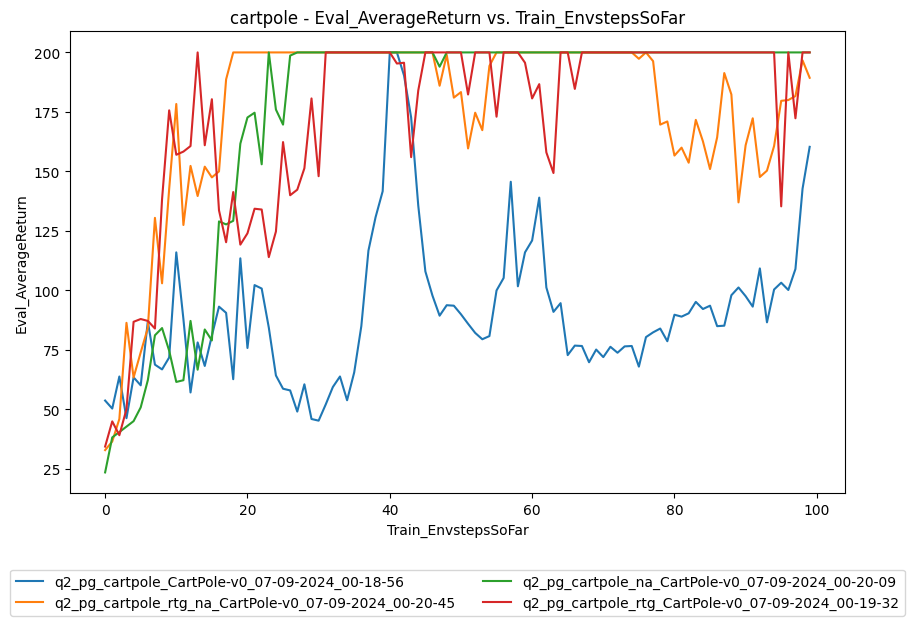

In [4]:
learning_curve_plotter(run_folders, keyword='cartpole', exclude='lb')

- Large batch runs

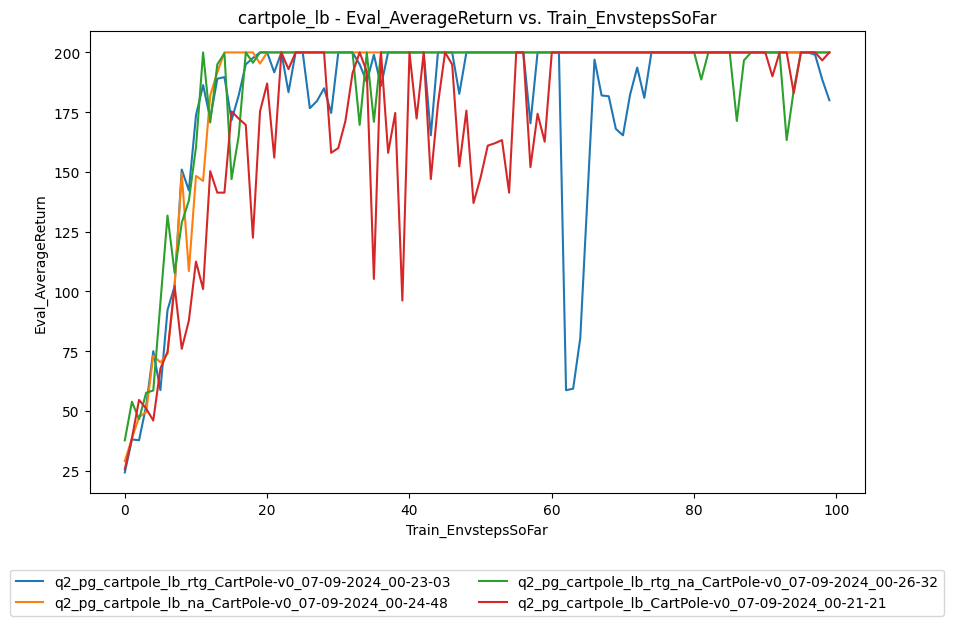

In [5]:
learning_curve_plotter(run_folders, keyword='cartpole_lb')

Answer the following questions briefly:

- Which value estimator has better performance without advantage normalization: the trajectory-centric one, or the one using reward-to-go?
  - 
- Did advantage normalization help?
  - 
- Did the batch size make an impact?
  - 

## 4. Using a Neural Network Baseline
### Experiment 2: Half  Cheetah

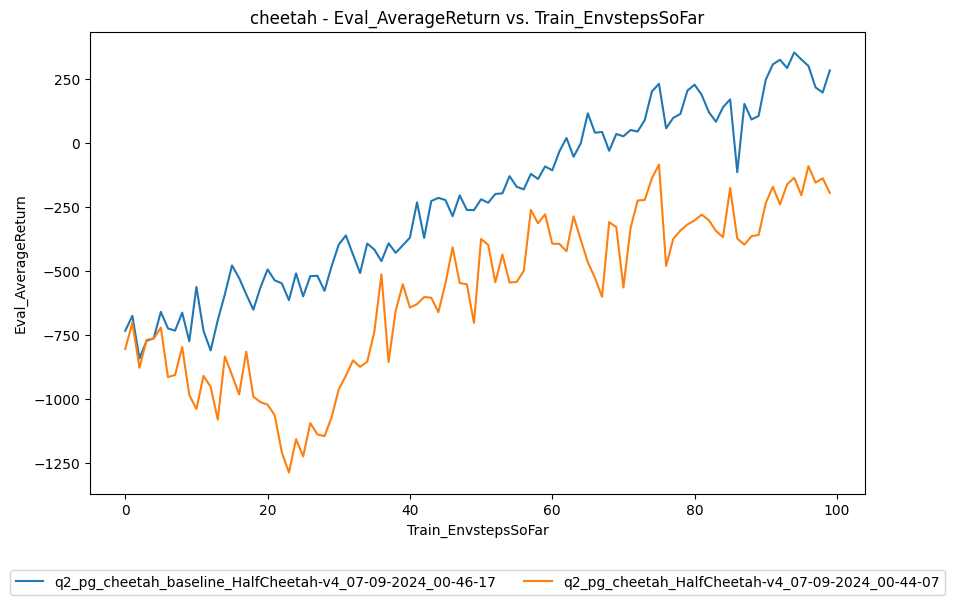

In [6]:
# Plotting the learning curve for the Cheetah environment
learning_curve_plotter(run_folders, keyword='cheetah', value_label='Eval_AverageReturn')

Could not retrieve data for /home/octo/code/homework_fall2023/hw2/data/q2_pg_cheetah_HalfCheetah-v4_07-09-2024_00-44-07: 'Key Baseline_Loss was not found in Reservoir'


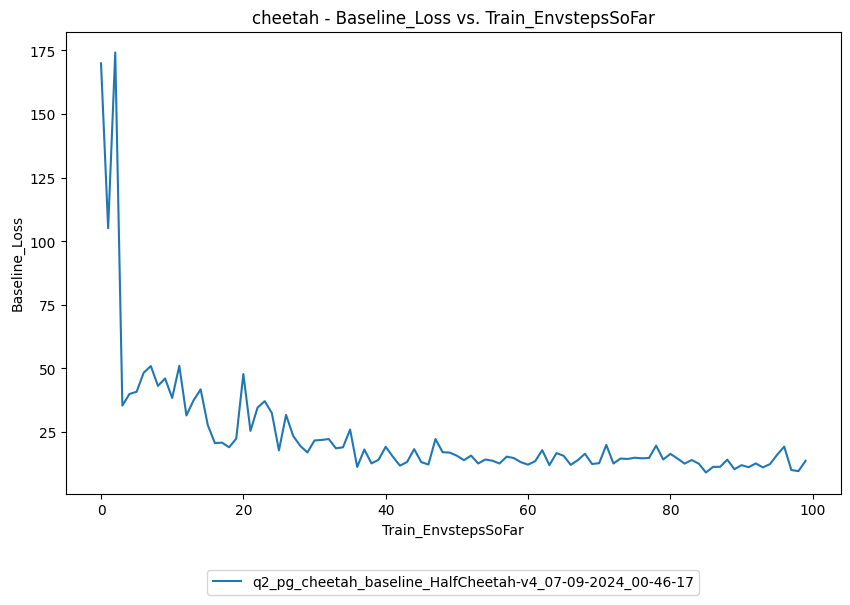

In [7]:
# Plot the baseline loss for the Cheetah environment
learning_curve_plotter(run_folders, keyword='cheetah', value_label='Baseline_Loss', step_label='Train_EnvstepsSoFar')

## 5. Generalized Advantage Estimation
### Experiment 3: LunarLander-v2

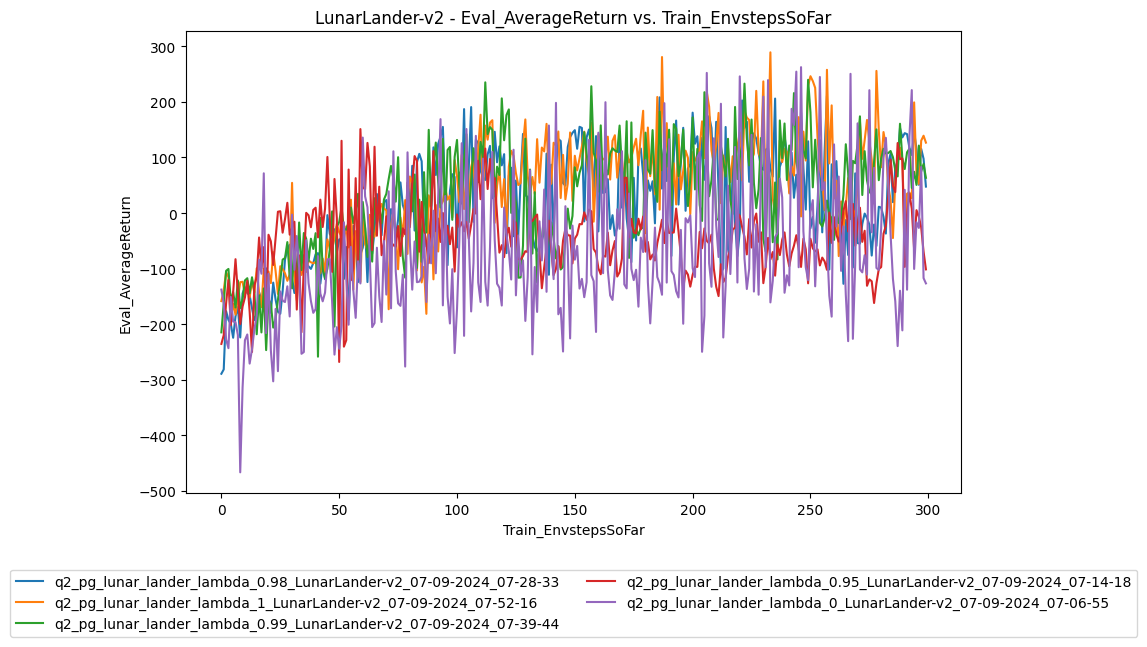

In [8]:
learning_curve_plotter(run_folders, keyword='LunarLander-v2', step_label='Train_EnvstepsSoFar', value_label='Eval_AverageReturn')

- When $\lambda=0$, GAE becomes $A_{GAE}^{\pi}(s_t, a_t)=\delta_t (s_t, a_t)=r(s_t, a_t) + \gamma V_{\phi}^{\pi}(s_{t+1}) - V_{\phi}^{\pi}(s_t)$, which is equivalent of single-step advantage estimator, with low-variance and high-bias. 
- When $\lambda=1$, GAE becomes  $A_{GAE}^{\pi}(s_t, a_t)=\sum_{t'=t}^{T-1}\gamma^{t'-t}\delta_{t'}$, which is the multi-step actor critic method, with high variance and low bias.


## 6. Hyperparameters and Sample Efficiency
### Experimeent 4. Inverted Pendulum

In the charts above, `hyp_search` runs use the following hyper-parameters, which which reaches 1000 average return using about half the steps as in the default runs.
```shell
for seed in $(seq 1 5); do
    python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 -n 100 \
    --exp_name pendulum_discount_hyp_search_s$seed \
    -rtg --use_baseline -na \
    --discount 0.99 \
    --use_reward_to_go \
    --gae_lambda 0.99 \
    -s 256 \
    -l 3 \
    -lr 0.001 \
    -blr 0.002 \
    --batch_size 5000 \
    --baseline_gradient_steps 20 \
    --seed $seed
done
```

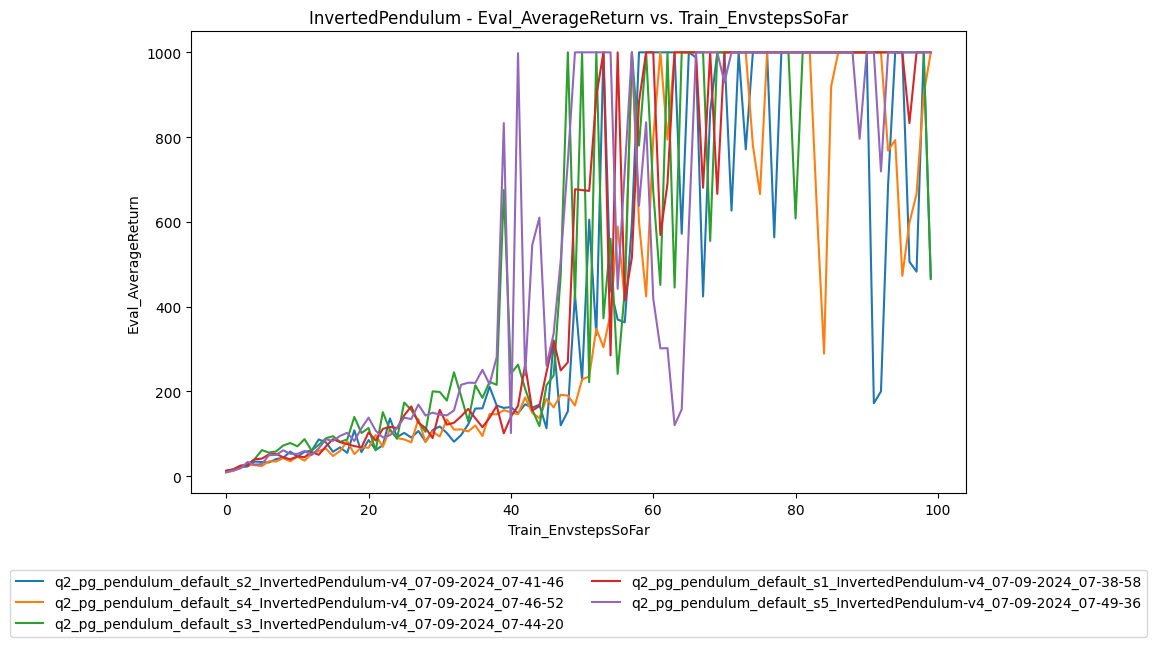

In [9]:
learning_curve_plotter(run_folders, keyword='InvertedPendulum', step_label='Train_EnvstepsSoFar', value_label='Eval_AverageReturn')

## 7. Humanoid
### Experiment 5. Humanoid-v4

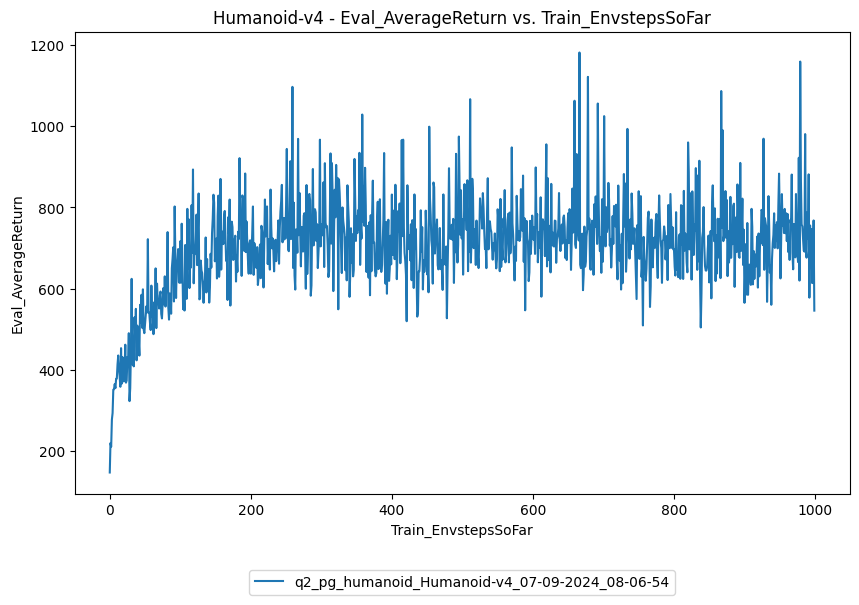

In [10]:
learning_curve_plotter(run_folders, keyword='Humanoid-v4', step_label='Train_EnvstepsSoFar', value_label='Eval_AverageReturn')